## **Model Training**

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report,f1_score,accuracy_score,recall_score,precision_recall_curve,recall_score,roc_auc_score,roc_curve,precision_score,confusion_matrix,average_precision_score

In [2]:
dataset = pd.read_csv('../datasets/processed/Telco-customer-churn-final-v1.csv')
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,Churn,HasInternet,InternetService_DSL,InternetService_Fiber_optic,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.280248,0,0,0,1,0,0,0,0,0,1,-1.161694,0,1,1,0,0,1,0
1,1,0,0,0,0.064303,1,0,1,0,1,0,0,0,1,0,-0.260878,0,1,1,0,0,0,1
2,1,0,0,0,-1.239504,1,0,1,1,0,0,0,0,0,1,-0.363923,1,1,1,0,0,0,1
3,1,0,0,0,0.512486,0,0,1,0,1,1,0,0,1,0,-0.747850,0,1,1,0,0,0,0
4,0,0,0,0,-1.239504,1,0,0,0,0,0,0,0,0,1,0.196178,1,1,0,1,0,1,0


#### **Splitting the dataset**

In [3]:
X = dataset.drop('Churn',axis=1)
X.shape

(7032, 22)

In [4]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,HasInternet,InternetService_DSL,InternetService_Fiber_optic,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.280248,0,0,0,1,0,0,0,0,0,1,-1.161694,1,1,0,0,1,0
1,1,0,0,0,0.064303,1,0,1,0,1,0,0,0,1,0,-0.260878,1,1,0,0,0,1
2,1,0,0,0,-1.239504,1,0,1,1,0,0,0,0,0,1,-0.363923,1,1,0,0,0,1
3,1,0,0,0,0.512486,0,0,1,0,1,1,0,0,1,0,-0.747850,1,1,0,0,0,0
4,0,0,0,0,-1.239504,1,0,0,0,0,0,0,0,0,1,0.196178,1,0,1,0,1,0


In [5]:
y = dataset['Churn']
y.shape

(7032,)

In [6]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [8]:
X_train.shape,X_test.shape

((5625, 22), (1407, 22))

In [10]:
y_train.shape,y_test.shape

((5625,), (1407,))

#### **Model Training without Hyper-Parameter Training**

In [11]:
model = LogisticRegression()

In [12]:
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [13]:
y_pred = model.predict(X_test)

In [23]:
y_pred_proba = model.predict_proba(X_test)

In [18]:
def print_classification_metrics(y_test, y_pred, y_pred_proba=None):
    print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))
    print("Precision: {:.4f}".format(precision_score(y_test, y_pred)))
    print("Recall: {:.4f}".format(recall_score(y_test, y_pred)))
    print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred)))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    if y_pred_proba is not None:
        print("ROC AUC Score: {:.4f}".format(roc_auc_score(y_test, y_pred_proba)))

In [24]:
print_classification_metrics(y_test,y_pred,y_pred_proba[:,1])

Accuracy: 0.8024
Precision: 0.6437
Recall: 0.5749
F1 Score: 0.6073

Confusion Matrix:
[[914 119]
 [159 215]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1033
           1       0.64      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

ROC AUC Score: 0.8337


In [20]:
def plot_roc_curve(y_test, y_probs):
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)

    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.3f})')
    plt.plot([0,1], [0,1], 'k--')  # diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

In [21]:
def plot_precision_recall_curve(y_test, y_probs):
    precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
    avg_precision = average_precision_score(y_test, y_probs)

    plt.figure(figsize=(8,6))
    plt.plot(recall, precision, label=f'Precision-Recall curve (AP = {avg_precision:.3f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

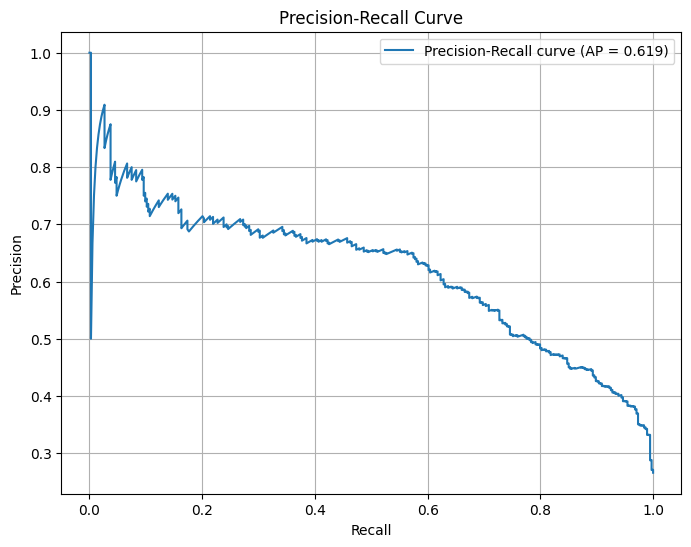

In [26]:
plot_precision_recall_curve(y_test,y_pred_proba[:,1])

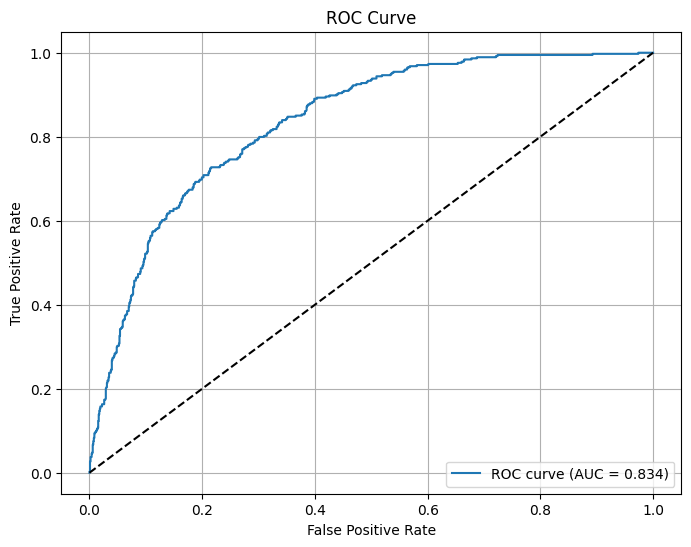

In [28]:
plot_roc_curve(y_test,y_pred_proba[:,1])

#### **Model Training with Hyper-Parameter Tuning**

In [71]:
param_grid = {
    'C': [0.01,0.03,0.1,0.5,1,10,100],
    'penalty': ['l1','l2'],
    'solver': ['liblinear','saga']
}

In [72]:
model = LogisticRegression()

In [74]:
grid_search = GridSearchCV(
    estimator=model,
    scoring='recall',
    param_grid=param_grid,
    verbose=1,
    n_jobs=-1,
    cv=5
)

In [75]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


,estimator,LogisticRegression()
,param_grid,"{'C': [0.01, 0.03, ...], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}"
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [76]:
def hpt_scores(foo):
    print("Best parameters found:",foo.best_params_)
    print("Best recall score:",foo.best_score_)

In [77]:
hpt_scores(grid_search)

Best parameters found: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Best recall score: 0.5424749163879599


In [78]:
best_logreg = grid_search.best_estimator_

In [79]:
y_pred = best_logreg.predict(X_test)
y_pred_proba = best_logreg.predict_proba(X_test)

In [80]:
print_classification_metrics(y_test,y_pred,y_pred_proba[:,1])

Accuracy: 0.8053
Precision: 0.6506
Recall: 0.5775
F1 Score: 0.6119

Confusion Matrix:
[[917 116]
 [158 216]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.58      0.61       374

    accuracy                           0.81      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407

ROC AUC Score: 0.8342


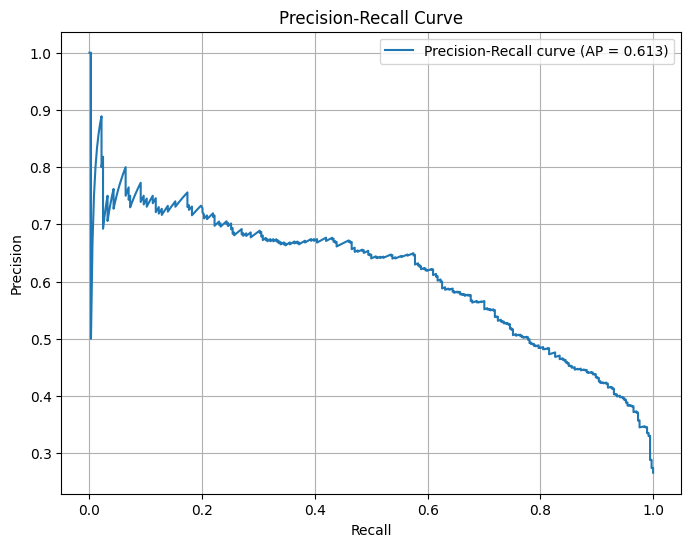

In [38]:
plot_precision_recall_curve(y_test,y_pred_proba[:,1])

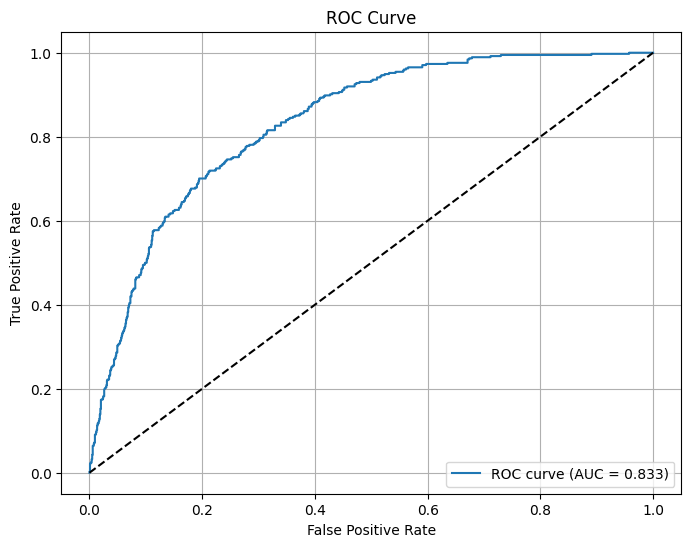

In [39]:
plot_roc_curve(y_test,y_pred_proba[:,1])

In [58]:
y_pred_custom = (y_pred_proba[:,1] >= 0.45).astype(int)
y_pred_custom

array([0, 1, 0, ..., 0, 0, 0], shape=(1407,))

In [59]:
print_classification_metrics(y_test,y_pred,y_pred_custom)

Accuracy: 0.8031
Precision: 0.6456
Recall: 0.5749
F1 Score: 0.6082

Confusion Matrix:
[[915 118]
 [159 215]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

ROC AUC Score: 0.7360


In [ ]:
param_grid = {
    'C': [0.01,0.03, 0.1,0.3, 1,3, 10],        
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1]  
}

In [61]:
model = LogisticRegression(
    solver='saga',
    penalty='elasticnet',
    max_iter=5000,
    random_state=42
)

In [63]:
grid_search = GridSearchCV(estimator=model,param_grid=param_grid,scoring='recall',verbose=1,n_jobs=-1,cv=5,refit=True)

In [64]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


,estimator,LogisticRegre...solver='saga')
,param_grid,"{'C': [0.01, 0.03, ...], 'l1_ratio': [0, 0.25, ...]}"
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'elasticnet'


In [65]:
hpt_scores(grid_search)

Best parameters found: {'C': 1, 'l1_ratio': 1}
Best recall score: 0.5431438127090301


In [67]:
y_pred = grid_search.predict(X_test)
y_pred_proba = grid_search.predict_proba(X_test)[:,1]

In [68]:
print_classification_metrics(y_test,y_pred,y_pred_proba)

Accuracy: 0.8053
Precision: 0.6506
Recall: 0.5775
F1 Score: 0.6119

Confusion Matrix:
[[917 116]
 [158 216]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.58      0.61       374

    accuracy                           0.81      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407

ROC AUC Score: 0.8342


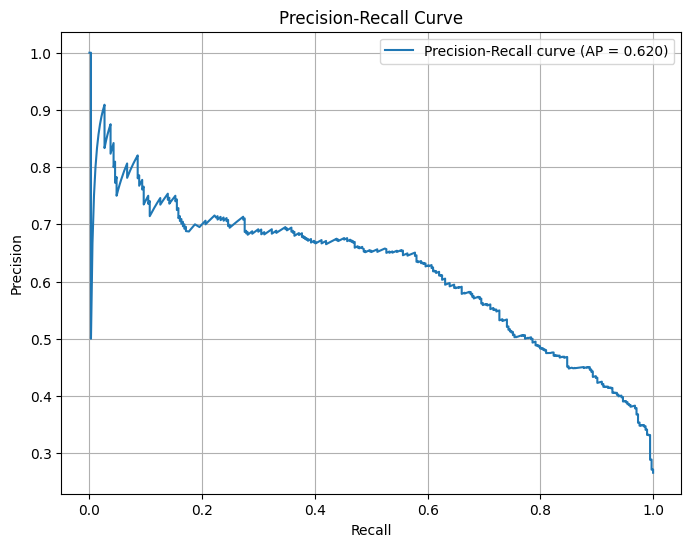

In [69]:
plot_precision_recall_curve(y_test,y_pred_proba)

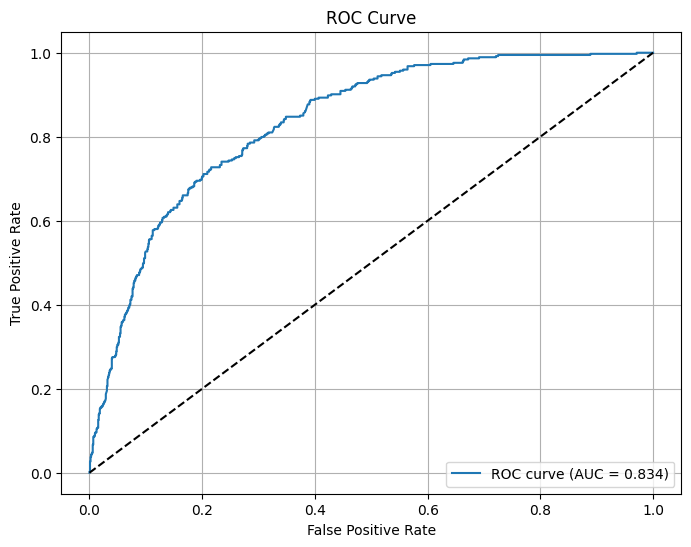

In [70]:
plot_roc_curve(y_test,y_pred_proba)

In [81]:
dataset2 = pd.read_csv('../datasets/processed/Telco-customer-churn-final-v2.csv')

In [82]:
model = LogisticRegression()

In [83]:
X = dataset2.drop('Churn',axis=1)
y = dataset['Churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [84]:
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [85]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [86]:
print_classification_metrics(y_test,y_pred,y_pred_proba)

Accuracy: 0.8031
Precision: 0.6483
Recall: 0.5668
F1 Score: 0.6049

Confusion Matrix:
[[918 115]
 [162 212]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

ROC AUC Score: 0.8363


In [87]:
grid_search.best_score_

np.float64(0.5424749163879599)

In [88]:
from sklearn.model_selection import StratifiedKFold

In [130]:
def logistic_regression_pipeline(dataset, target_col='Churn'):
    # Separate features and target
    X = dataset.drop(columns=[target_col])
    y = dataset[target_col]

    # Train-Test split (optional, you can also fit GridSearch on full dataset)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    # Define Stratified K-Fold
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Define model and parameter grid
    model = LogisticRegression(penalty='l1', max_iter=1000)
    
    # param_grid = {
    #     'C': [0.01, 0.1, 1, 10, 100],
    #     'penalty': ['l1', 'l2']
    # }
    
    param_grid = {
        'C': [0.01, 0.1, 1,10],        
        # 'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
        'solver': ['saga','liblinear']  
    }

    # Grid Search 
    grid = GridSearchCV(
        model,
        param_grid,
        cv=5,
        scoring='recall',
        n_jobs=-1
    )
    
    # Fit
    grid.fit(X_train, y_train)

    # Best model
    best_model = grid.best_estimator_

    # Predictions
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]

    # Evaluation
    print_classification_metrics(y_test,y_pred,y_proba)

    return best_model, grid,y_test,y_proba

In [131]:
best_model, grid_search, y_test, y_proba = logistic_regression_pipeline(dataset) 

Accuracy: 0.8053
Precision: 0.6506
Recall: 0.5775
F1 Score: 0.6119

Confusion Matrix:
[[917 116]
 [158 216]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.58      0.61       374

    accuracy                           0.81      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407

ROC AUC Score: 0.8342


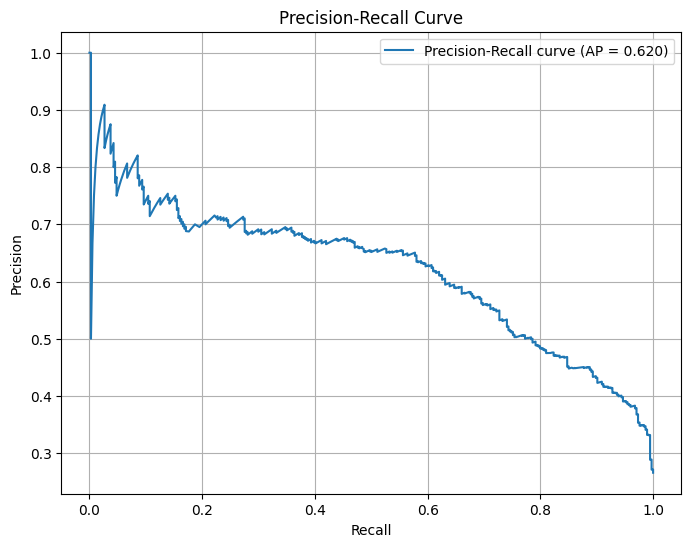

In [132]:
plot_precision_recall_curve(y_test,y_proba)

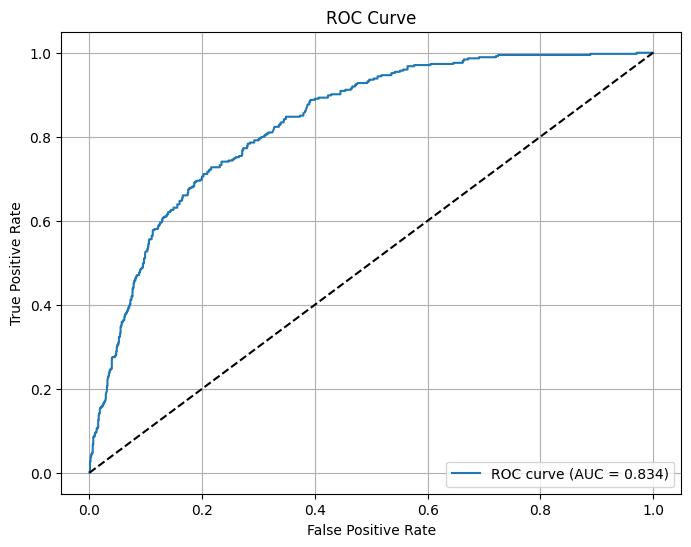

In [133]:
plot_roc_curve(y_test,y_proba)

In [134]:
import joblib

In [135]:
joblib.dump(best_model,'../models/logistic_model_v1.pkl')

['../models/logistic_model_v1.pkl']

In [121]:
best_model, grid_search,y_test,y_proba = logistic_regression_pipeline(dataset2) 

Accuracy: 0.8003
Precision: 0.6388
Recall: 0.5722
F1 Score: 0.6037

Confusion Matrix:
[[912 121]
 [160 214]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1033
           1       0.64      0.57      0.60       374

    accuracy                           0.80      1407
   macro avg       0.74      0.73      0.74      1407
weighted avg       0.79      0.80      0.80      1407

ROC AUC Score: 0.8353
